<a href="https://colab.research.google.com/github/Devisri-3036/chatbot/blob/main/Devisri0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Upload the Dataset

In [ ]:
from google.colab import files
uploaded = files.upload()


Saving chatbot_data.json to chatbot_data.json


Load the Dataset

In [ ]:
import pandas as pd
import json

# Correct file name (no backslash or special characters)
with open("chatbot_data.json", "r") as file:
    data = json.load(file)

# Flatten the JSON: Each pattern becomes a row with its tag
records = []
for intent in data['intents']:
    for pattern in intent['patterns']:
        records.append({
            'patterns': pattern,
            'tag': intent['tag']
        })

# Convert to DataFrame
df = pd.DataFrame(records)

# Show the first few rows
df.head()


,patterns,tag
0,Hi,greeting
1,Hey,greeting
2,How are you,greeting
3,Is anyone there?,greeting
4,Hello,greeting


Data Exploration

In [ ]:
# Overview of the data
df.info()
df.describe()
df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43 entries, 0 to 42
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   patterns  43 non-null     object
 1   tag       43 non-null     object
dtypes: object(2)
memory usage: 820.0+ bytes


,patterns,tag
0,Hi,greeting
1,Hey,greeting
2,How are you,greeting
3,Is anyone there?,greeting
4,Hello,greeting


Check for Missing Values and Duplicates

In [ ]:
# Check missing values
print(df.isnull().sum())

# Check duplicates
print(f"Duplicates: {df.duplicated().sum()}")


patterns    0
tag         0
dtype: int64
Duplicates: 0


Visualize a Few Features

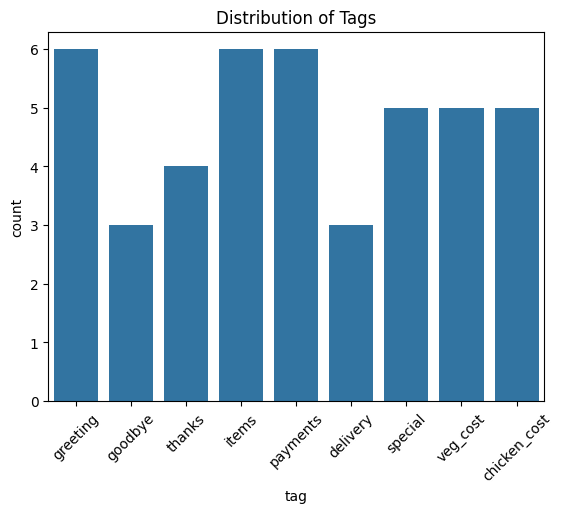

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Example: Visualize distribution of a column (change 'column_name')
sns.countplot(x='tag', data=df)
plt.title("Distribution of Tags")
plt.xticks(rotation=45)
plt.show()


Identify Target and Features

In [ ]:
# Assuming 'tag' is the label and 'patterns' are features
X = df['patterns']
y = df['tag']


Convert Categorical Columns to Numerical (if needed)

In [ ]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)


 One-Hot Encoding (optional if needed for multiple classes)

In [ ]:
import pandas as pd
y_onehot_df = pd.get_dummies(pd.Series(y), prefix="tag")



 Feature Scaling (only if features are numeric)

In [ ]:
# Skip if working with text data


 Train-Test Split

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)


Model Building (Example: Text Classification using TF-IDF + Naive Bayes)

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline

model = make_pipeline(TfidfVectorizer(), MultinomialNB())
model.fit(X_train, y_train)


Pipeline(steps=[('tfidfvectorizer', TfidfVectorizer()),
                ('multinomialnb', MultinomialNB())])

Evaluation

In [ ]:
from sklearn.metrics import classification_report, accuracy_score

y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.25      1.00      0.40         1
           1       0.00      0.00      0.00         1
           2       0.00      0.00      0.00         1
           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00         0
           5       0.00      0.00      0.00         1
           7       1.00      1.00      1.00         1
           8       0.00      0.00      0.00         3

    accuracy                           0.22         9
   macro avg       0.16      0.25      0.17         9
weighted avg       0.14      0.22      0.16         9

Accuracy: 0.2222222222222222


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_

Make Predictions from New Input

In [ ]:
new_input = ["hello, how can I help you?"]
prediction = model.predict(new_input)
predicted_label = label_encoder.inverse_transform(prediction)
print("Predicted Tag:", predicted_label[0])


Predicted Tag: items


Convert to DataFrame and Encode (if working with new raw data)

In [ ]:
# For new raw input data
new_df = pd.DataFrame({'patterns': ["hi, can you help me?"], 'tag': ["greeting"]})
new_df['tag_encoded'] = label_encoder.transform(new_df['tag'])
new_df


,patterns,tag,tag_encoded
0,"hi, can you help me?",greeting,3


Predict the Final Grade (custom logic if needed)

In [ ]:
# If you have a grading system based on tag or prediction
# Example:
if predicted_label[0] == "greeting":
    print("Grade: A")


Deployment - Building an Interactive App

In [ ]:
!pip install gradio
import gradio as gr


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.1/54.1 MB 17.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 322.9/322.9 kB 20.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 95.2/95.2 kB 7.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.5/11.5 MB 109.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.0/72.0 kB 6.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.5/62.5 kB 5.5 MB/s eta 0:00:00


Create a Prediction Function

In [ ]:
def chatbot_response(text):
    prediction = model.predict([text])
    return label_encoder.inverse_transform(prediction)[0]


Create the Gradio Interface

In [ ]:
interface = gr.Interface(fn=chatbot_response, inputs="text", outputs="text", title="Chatbot Tag Predictor")
interface.launch()


It looks like you are running Gradio on a hosted a Jupyter notebook. For the Gradio app to work, sharing must be enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://1c8b749c14e914cade.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


Customer Service Chatbot

In [ ]:
intents = {item['tag']: item['responses'][0] for item in data['intents']}

def chatbot_full_response(text):
    tag = model.predict([text])[0]
    tag = label_encoder.inverse_transform([tag])[0]
    return intents.get(tag, "Sorry, I didn’t understand that.")

interface = gr.Interface(fn=chatbot_full_response, inputs="text", outputs="text", title="Customer Service Chatbot")
interface.launch()


It looks like you are running Gradio on a hosted a Jupyter notebook. For the Gradio app to work, sharing must be enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://e3f82f2143002bc1c4.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
